In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, y = data.data, data.target
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Tách tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from tensorflow.keras.layers import InputLayer, Dense, Activation, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import Loss 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import MeanAbsoluteError
import numpy as np

In [34]:
shape = (8,)

In [50]:
model = Sequential([
    InputLayer(shape=shape),
    Dense(1,)  # Linear model: y = wx + b
])

In [51]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(optimizer='adam',
              loss=Loss(),
              metrics=['acc'])

In [53]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


NotImplementedError: 

In [18]:
model.predict(np.array(X_test,dtype=int))

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step


array([[1.2196562],
       [2.0538929],
       [2.072111 ],
       ...,
       [4.5922832],
       [2.0538929],
       [2.0538929]], dtype=float32)

Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3540 - mean_absolute_error: 0.4198 - val_loss: 0.3623 - val_mean_absolute_error: 0.4057
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3555 - mean_absolute_error: 0.4250 - val_loss: 0.3703 - val_mean_absolute_error: 0.4520
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3294 - mean_absolute_error: 0.4092 - val_loss: 0.3275 - val_mean_absolute_error: 0.4169
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3476 - mean_absolute_error: 0.4160 - val_loss: 0.3063 - val_mean_absolute_error: 0.4055
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3325 - mean_absolute_error: 0.4095 - val_loss: 0.3833 - val_mean_absolute_error: 0.4120
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3374 - mean_absolute_error: 0.4107 - val_loss: 0.3402 - val_mean_absolute_error: 0.4362
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3240 - mean_absolute_error: 0.4063 - v

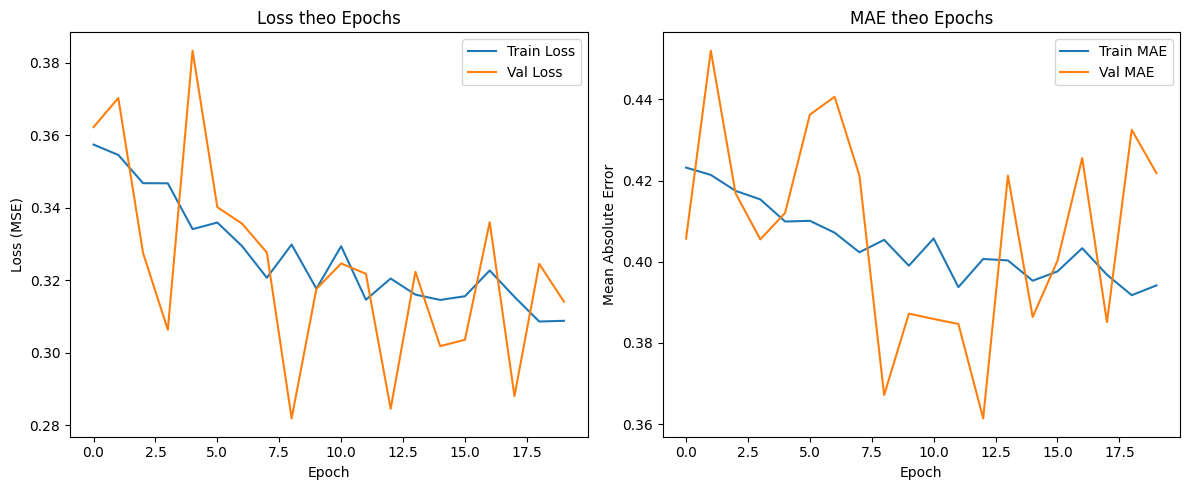

In [27]:
import matplotlib.pyplot as plt

# Huấn luyện và lưu kết quả vào biến history
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_test, y_test)
)

# Vẽ biểu đồ loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss theo Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

# Vẽ biểu đồ MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.title('MAE theo Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()
